In [1]:
import pandas as pd
import numpy as np
import tensorflow

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation
from tensorflow.keras.models import Sequential

import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
os.listdir('Dataset')

['Test', 'Train', 'Val']

In [3]:
IMAGE_SIZE=[224,224]

train_path = 'Dataset/Train'
val_path = 'Dataset/Val'
test_path = 'Dataset/Test'

# Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train', target_size=(224,224), batch_size=32, class_mode='categorical')
val_set = val_datagen.flow_from_directory('Dataset/Val', target_size=(224,224), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 456 images belonging to 2 classes.


# Model Building

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model=Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history=model.fit(training_set,
                  batch_size=32,
                  verbose=1,
                  epochs=5,
                  validation_data=val_set)

Epoch 1/5
114/114 [==============================] - 154s 1s/step - loss: 0.2774 - accuracy: 0.9415 - val_loss: 0.0522 - val_accuracy: 0.9824
Epoch 2/5
114/114 [==============================] - 125s 1s/step - loss: 0.0490 - accuracy: 0.9821 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 3/5
114/114 [==============================] - 129s 1s/step - loss: 0.0444 - accuracy: 0.9843 - val_loss: 0.0392 - val_accuracy: 0.9846
Epoch 4/5
114/114 [==============================] - 123s 1s/step - loss: 0.0511 - accuracy: 0.9830 - val_loss: 0.0442 - val_accuracy: 0.9890
Epoch 5/5
114/114 [==============================] - 155s 1s/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0526 - val_accuracy: 0.9890


In [17]:
print("Evaluate on test data")
results=model.evaluate(test_set,batch_size=32)
print("test loss, test acc:",results)

Evaluate on test data
15/15 [==============================] - 17s 1s/step - loss: 0.0301 - accuracy: 0.9890
test loss, test acc: [0.03010520152747631, 0.9890350699424744]


In [19]:
model.save('model(with-vgg16).h5')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [49]:
def plot(history):
    fig,axes=plt.subplots(1,2,figsize=(10,4))
    axes[0].plot(history["loss"],"r-",history["val_loss"],"b-",linewidth=0.5)
    axes[0].set_title("loss curve")
    axes[1].plot(history["accuracy"],"r-",history["val_accuracy"],"b-",linewidth=0.5)
    axes[1].set_title("Accuracy Curve")
    fig.show()

C:\Users\abhis\AppData\Local\Temp\ipykernel_724\3418102128.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


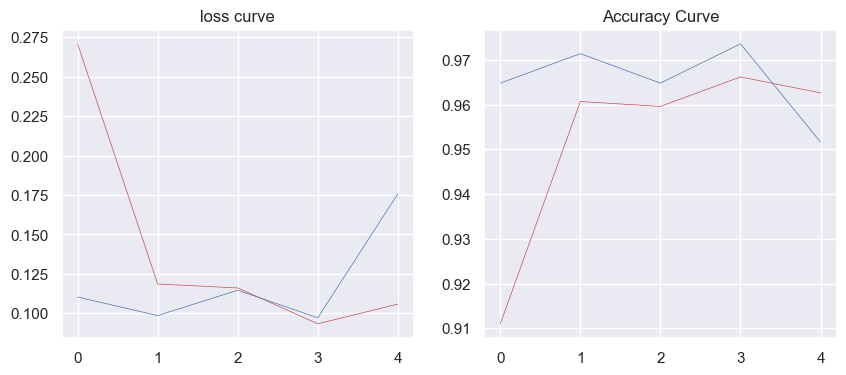

In [50]:
plot(history.history)

# Predictions

In [6]:
import cv2

Text(0.5, 1.0, 'Testing Image')

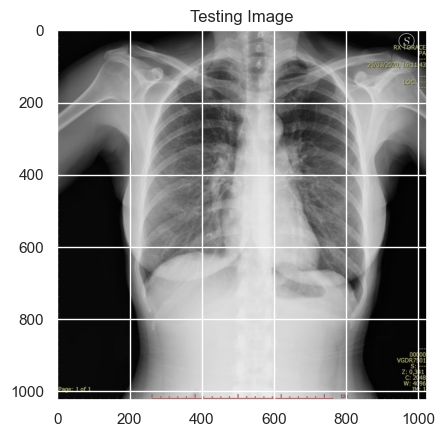

In [7]:
img=cv2.imread('Dataset\Test\COVID\COVID-19 (1158).jpg')

plt.imshow(img)
plt.title("Testing Image")

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [10]:
mymodel = load_model('model(with-vgg16).h5')

In [11]:
img = image.load_img(r'Dataset\Test\COVID\COVID-19 (1167).jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

img_data = preprocess_input(x)

classes = mymodel.predict(img_data)

result = classes[0][0]

1/1 [==============================] - 7s 7s/step


In [12]:
classes

array([[1., 0.]], dtype=float32)

In [13]:
if result>0:
    print("Person  is affected by COVID-19")
else:
    print("Result is normal")

Person  is affected by COVID-19



# Confusion Matrix

In [14]:
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

Found 456 images belonging to 2 classes.


In [15]:
y_pred = np.argmax(mymodel.predict(test_set), axis=1)

15/15 [==============================] - 17s 697ms/step


In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
y_test = test_set.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[124   5]
 [  0 327]]


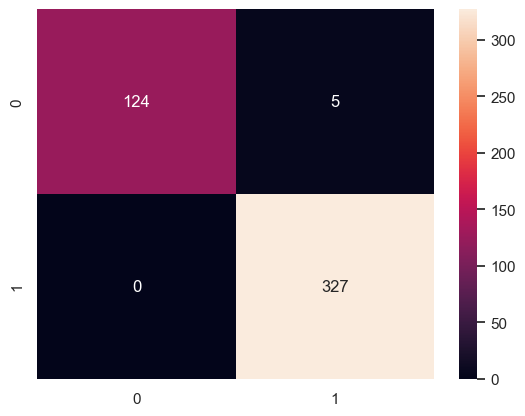

In [20]:
cm = sns.heatmap(cm,annot=True, fmt="d")

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, y_pred, target_names=['COVID-19', 'Normal']))

              precision    recall  f1-score   support

    COVID-19       1.00      0.96      0.98       129
      Normal       0.98      1.00      0.99       327

    accuracy                           0.99       456
   macro avg       0.99      0.98      0.99       456
weighted avg       0.99      0.99      0.99       456



In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, auc

ROC AUC score: 0.9806201550387598


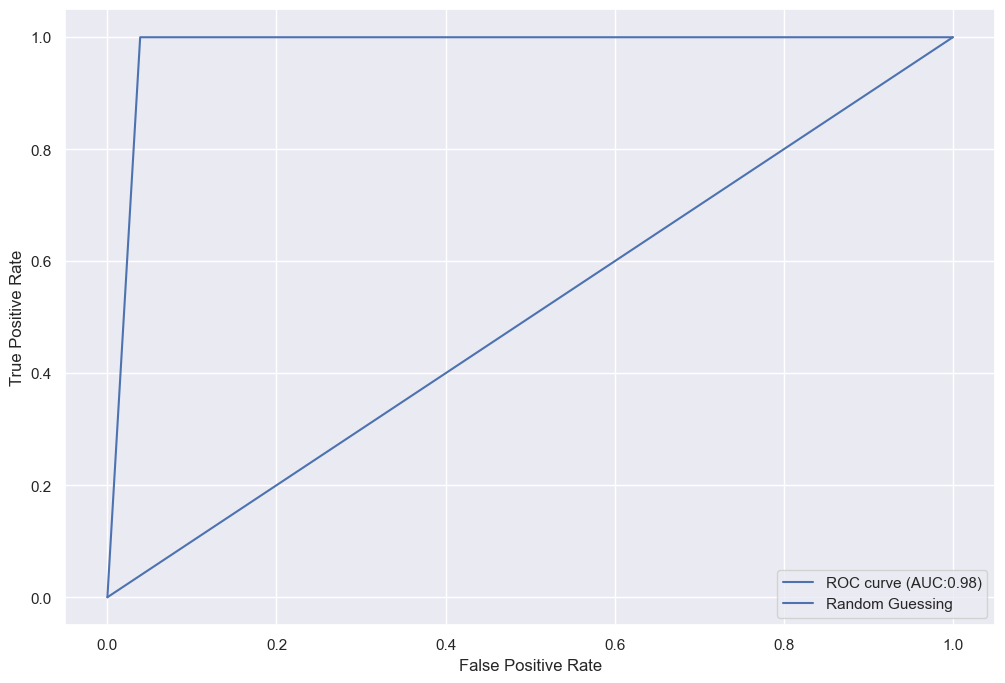

In [24]:
target = ['ROC curve']

fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))

def roc(y_test, y_pred, average=None):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:, idx].astype(int), y_pred[:, idx])
        c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))

    c_ax.plot([0, 1], [0, 1], 'b-', label='Random Guessing')

    return roc_auc_score(y_test, y_pred, average=average)

# Assuming you have y_test and y_pred defined
# y_test and y_pred should be binary (0 or 1) or probabilities

print('ROC AUC score:', roc(y_test, y_pred, average=None))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()